# Zipf

# A1.  Zipf’sches Gesetz - Understanding


Rate the following statement as true or false and briefly justify your decision! 


 1. If you plot the ranks and frequencies of words from a corpus in a coordinate system, you get a straight line according to Zipf's law.

 2. From Zipf's law follows that the number of different word forms (types) in a text is proportional to its length.  

 3.  If one plots the curves to Zipf's law for several corpora of a language in a double logarithmic coordinate system, one obtains approximately parallel curves.

 4. The constant c is different for different languages.


### Solution:

1. Almost : The Zipf law will show a linear relation in the a log-log plot! It's a powerlaw in regular coordinates.
2. Yes it does. Since many words only occurr once in the text it is likely to gain more types the longer the text
3. Yes in loglog world the the constant c corresponts to the intercept of the linear representation
4. Yes, c is language dependent.(Mostly connected to type-token-ratio)

# A2. The long tail of the distribution

From the lecture: It holds $I_n$ - the number of types that occurr $n$ times in a given corpus - fullfills the equation $$ I_n = r_n – r_{n+1} $$
    
 
How many words will likely occur only once in any given text? Deduce a formula.

### Solution

$$ I_n = r_n - r_{n+1} = c \frac{N}{n} - c \frac{N}{n+1} = \frac{cN}{n(n+1)}$$
Now $n=1$ and $cN = |V|$
$$I_1 = \frac{|V|}{2}$$

It is to be expected that half the words in the vocabulary only occur once !

# A3. Application of Zipf's Law
Given the following data from an english corpus with a total number of 71.370 words (tokens):

|  Word  | Frequency | rank |
|-------|-----------|------|
| he    | 877       | 10   |
| but   | 410       | 20   |
| comes | 16        | 500  |
| applausive | 1    | 8000 |



(a) Estimate Zipf's constant from this data.

(b) From that estimation derive:
    
    - What will be the number of different word forms (types)? 
    - How many of them will appear only once in the text? 
    - Related to the total number of tokens: How high will be the share of word forms that occur only once in the text?
    
 (c) After estimation, assume that `applausive` is the lowest ranked word. Calulate the Zipf constant mathematically by using the Harmonic Series.
 
 (d) What is the difference of the two methods to obtain $c$?


|  Word  | Frequency | rank | f*r|
|-------|-----------|------|------|
| he    | 877       | 10   | 8770 |
| but   | 410       | 20   | 8200 |
| comes | 16        | 500  | 8000 |
| applausive | 1    | 8000 | 8000 |

    a) (8770 + 8200 + 8000 + 8000) / 4 / 71370 = 0.11548970155527533
    b)
        -  ~ 8242
        -  ~ 4121
        -  ~ 5.7 %

    c) harmonic series:
$$ c = \frac{1}{\sum_{i=1}^{8000}{\frac{1}{i}}} $$

    d) 
    - statistical vs arithmetic approximation
    - harmonic series only dependent on vocabulary size
       

In [30]:
# harmonic series
1/sum([1/i for i in range(1,8000)])


0.104554935949181

In [ ]:
import numpy 
1/numpy.log(8000)

# A4. - Further Application of Zipf’s Law
From the lecture:$r(n_w=x)$ gives the largest rank of all word forms that occur $x$ times in the corpus.
The number of types that probably occur exactly $n$ times in a given corpus $w_n$ fulfills the equation $$ w_n = r(n_w = n) – r(n_w=n+1) $$

a) Deduce a formula to generalize this result to calculate the number of words that probably occur $n$ to $m$ times in a corpus.

Given a text corpus of German with 1 million sentences and 16 015 429 tokens. (Assume c=0.08)

(b) How large is the vocabulary according to Zipf's law?
    
(c) How many words occur 100 times or more in this text according to Zipf's law?

(d) According to Zipf's law, how many words occur exactly 100 times in this text?


### Solution:
a) $$ w_{n, m} = r_n - r_{m+1} | n\leq m $$
   $$=  \frac{cN}{n} - \frac{cN}{m+1} $$
   $$= cN \left(\frac{1}{n}-\frac{1}{m+1}\right) $$
   $$= cN\left(\frac{m-n+1}{n(m+1)}\right)$$
Assume: 
   $$ n = 100; m = 150$$
   $$ 0.08 \cdot 16015429 \left(\frac{150-100+1}{100(150+1)}\right)$$
   $$ = 1281234 \left(\frac{51}{15100}\right)$$
   $$ = 4327 $$

b) $$ |V| = cN = 0.08 \cdot 16015429 = 1281234 $$ 

c) $$ r_n = c \frac{N}{100} = 12812$$

d) $$ r_{100} - r_{101} = \frac{cN}{n(n+1)} = 127 $$


# Programming

We can use some of the corpora to empirically verify the Zipf assumptions. 

Use the complete books corpus as English corpus.

As German Corpus we will upload a corpus of news articles from Tagesschau.

If you are interested in other resources or other languages see [here](https://wortschatz.uni-leipzig.de/en/download/)

In [31]:
import matplotlib.pyplot as plt
import nltk
import pathlib

In [32]:
def load_german_text(path):
    text = []
    for f in pathlib.Path(path).glob("*.txt"):
        with open(f, "r") as openf:
            text.extend(nltk.word_tokenize(openf.read(),language = "german"))
    return text


In [33]:
english_text = nltk.corpus.gutenberg.words(nltk.corpus.gutenberg.fileids())
german_text = load_german_text("../../Woche 5/tagesschau_corpus/")

In [34]:
english_freq = nltk.FreqDist(english_text)
print(f"Number of token (English):{sum(english_freq.values())}")

german_freq = nltk.FreqDist(german_text)
print(f"Number of token (German):{sum(german_freq.values())}")

Number of token (English):2621613
Number of token (German):5031699


In [35]:
english_text[100:105]

['mother', 'had', 'died', 'too', 'long']

In [36]:
german_text[100:105]

['Selbstradikalisierung', ',', 'ein', '``', 'einsamer']

In [37]:
german_freq["Leipzig"]

90

## P1 - The Zipf Constant

Write two functions that each return the zipf constant.

    a) Try to estimate the Zipf constant by using empirical frequencies and ranks from the data. (Restrict to rank 10 to 10000.
    b) Calculate the Zipf constant by using the Harmonic Series.

What happens?

In [ ]:
german_freq=nltk.FreqDist(german_text)
english_freq = nltk.FreqDist(english_text)

In [38]:
sorted(german_freq.items(), key = lambda w : w[1],  reverse = True)[0:10]

[('.', 275361),
 (',', 229586),
 ('der', 131840),
 ('die', 130646),
 ('und', 85704),
 ('in', 76663),
 ('``', 59256),
 ("''", 59100),
 ('den', 48594),
 ('von', 40869)]

In [39]:
 print(list(zip(range(1,len(german_freq)),sorted(german_freq.values(), reverse=True)))[0:5])
 zipf = [x*y for x,y in zip(range(1,len(german_freq)),sorted(german_freq.values(), reverse=True))]
 print(zipf[0:5])

[(1, 275361), (2, 229586), (3, 131840), (4, 130646), (5, 85704)]
[275361, 459172, 395520, 522584, 428520]


Reminder: 
- statistical approach: $$c=\frac{r_n * n }{N}$$

- harmonic series: $$ c = \frac{1}{\sum_{i=1}^{n}{\frac{1}{i}}} $$

In [40]:
def estimate_c(freq, N):
    zipf = [x*y for x,y in zip(range(1,len(freq)),sorted(freq.values(), reverse=True))]
    r10to10000 = zipf[10:10000]
    c = sum(r10to10000) / len(r10to10000) / N
    return c

def calculate_c(freq):
    return 1/sum([1/i for i in range(1,len(freq))])

In [41]:
estimate_c(german_freq, len(german_text)),estimate_c(english_freq, len(english_text))

(0.0820603193726268, 0.06143058090935218)

In [42]:
calculate_c(german_freq),calculate_c(english_freq)

(0.07942139990607355, 0.087566893771156)

In [43]:
plt.scatter(range(len(english_freq)),sorted(english_freq.values(), reverse=True), label="english")
plt.scatter(range(len(german_freq)),sorted(german_freq.values(), reverse=True), label="german")
plt.yscale('log')
plt.xscale('log')
plt.legend()

## P2 - Words Occuring Once

We predict that half of the vocabularies in real corpora only occur once. Write a function that confirms the prediction.

In [44]:
def occur_once(freq):
    I_1 = sum([1 for x in freq.values() if x == 1])
    return I_1 / len(freq)

In [45]:
occur_once(german_freq), occur_once(english_freq)

(0.4876109680351462, 0.40437094377981075)

# P3  - Text Coverage

The Zipf Power follows similar patterns to the Pareto law (see [here](https://en.wikipedia.org/wiki/Pareto_principle#:~:text=The%20Pareto%20principle%20states%20that,the%20principle%20of%20factor%20sparsity.)).

Not only does a large percentage of words only occur once, also very few words already cover high percentages of any written text.

Calculate the text coverage in dependence of rank.

Plot the results.

What percentage of all words in the vocabulary are needed to cover 80 % of the text corpus ?

In [46]:
ngram_values = sorted(german_freq.values(), reverse=True)
ngram_values[:10]
all_ngrams = sum(ngram_values)
p = [0.]
p
all_ngrams
i=1
print(ngram_values[i]/all_ngrams)
i=2
print(ngram_values[i]/all_ngrams)

0.045627928061674594
0.026201885287653336


In [47]:
def accumulated(freq, t = 0.8):
    ngram_values = sorted(freq.values(), reverse=True)
    all_ngrams = sum(ngram_values)
    p = [0.]
    for i in range(len(ngram_values)):
        p.append(p[-1] + ngram_values[i]/all_ngrams)
    p = p[1:]
    for i in range(len(p)):
        if p[i]>t:
            break
    return p, i

In [48]:
english_acc, english_i = accumulated(english_freq, t=0.8)
german_acc, german_i = accumulated(german_freq, t=0.8)


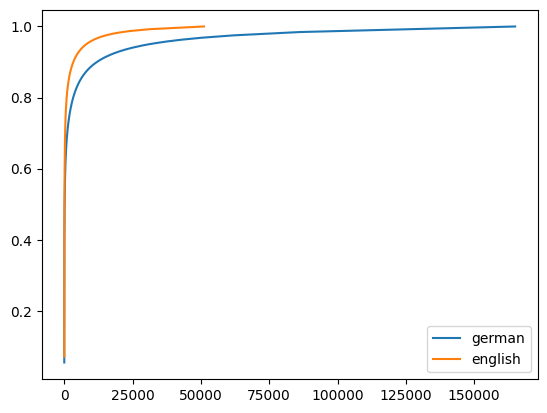

In [49]:
plt.plot(german_acc, label="german")
plt.plot(english_acc, label="english")
plt.legend()

In [50]:
german_i, english_i

(3264, 876)

In [51]:
german_i/ len(german_freq), english_i / len(english_freq)

(0.01977882139069838, 0.01712409101571663)

# P3 - Ngrams


The Zipf law is a special case of a power law. These hold for many other natural occurring things aswell.

Verify a similar relation for character ngrams. 
(Not a mathematical proof. Convince yourself by plotting or looking at the rank/frequency product.)

(Reuse above code if possible!)


In [52]:
def ngram_c(text, n=3):
    ngrams = nltk.FreqDist([gram for word in text for gram in nltk.ngrams(word,n)])
    
    k = [x*y for x,y in zip(range(1,len(ngrams)),sorted(ngrams.values(), reverse=True))]
    r10to10000 = k[10:10000]
    
    c = sum(r10to10000) / len(r10to10000) / sum(ngrams.values())
    return ngrams, c

In [53]:
german_ngram_freq, german_ngram_c = ngram_c(german_text,n=3)
english_ngram_freq, english_ngram_c = ngram_c(english_text,n=3)
german_ngram_c, english_ngram_c

(0.07230456913141788, 0.052468197996678644)

In [55]:
plt.scatter(range(len(english_ngram_freq)),sorted(english_ngram_freq.values(), reverse=True), s=2, label="english")
plt.scatter(range(len(german_ngram_freq)),sorted(german_ngram_freq.values(), reverse=True), s=2, label="german")
plt.yscale('log')
plt.xscale('log')
plt.legend()

## How many ngrams cover 80% of the text ? 

How many of the top frequent ngrams would you need to cover 90% of the text.

How much do these top ngrams overlap for German and English?


In [56]:
german_ngram_acc, german_ngram_i = accumulated(german_ngram_freq, t=0.8)
english_ngram_acc, english_ngram_i = accumulated(english_ngram_freq, t=0.8)

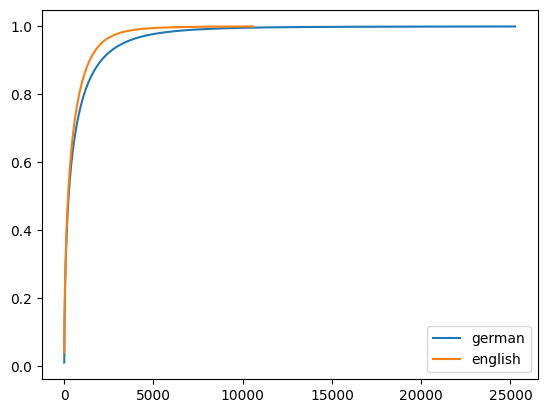

In [57]:
plt.plot(german_ngram_acc, label="german")
plt.plot(english_ngram_acc, label="english")
plt.legend()

In [58]:
german_ngram_i, english_ngram_i

(1107, 834)

In [59]:
s1 = set([x[0] for x in german_ngram_freq.most_common(german_ngram_i)])
s2 = set([x[0] for x in english_ngram_freq.most_common(english_ngram_i)])
len(s1.intersection(s2)) / len(s1 | s2)

0.23709369024856597

## You can use this information in the Application Task in Notebook `Language Detection`. ( You can also go for 90% or 95% text coverage)